In [7]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [3]:
insurance_df = pd.read_csv("insurance.csv")

In [4]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_12336\3669467742.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['age'])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


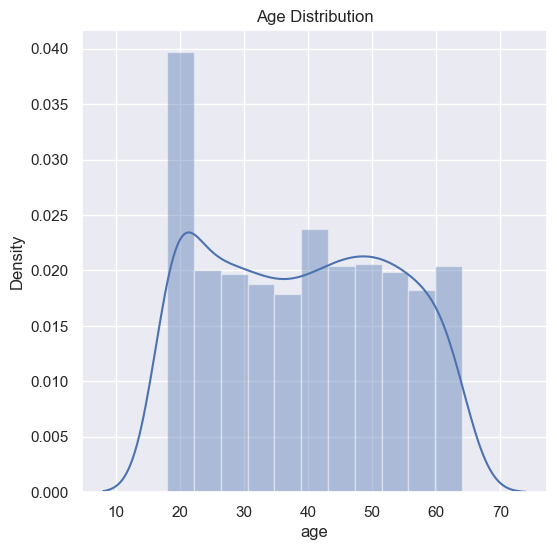

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['age'])
plt.title('Age Distribution')
plt.show()

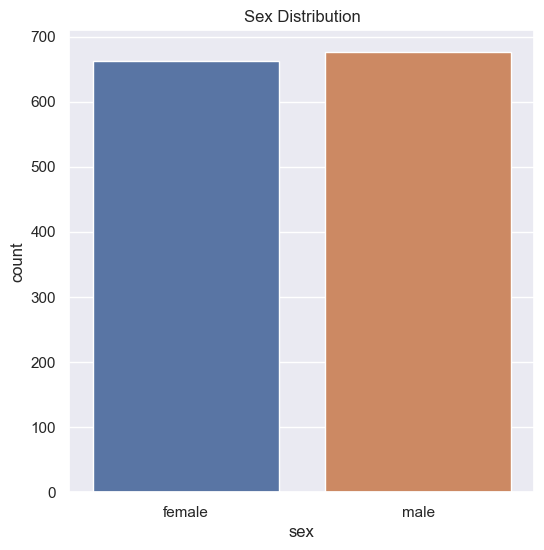

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = insurance_df)
plt.title("Sex Distribution")
plt.show()

In [14]:
insurance_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_12336\2246669123.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['bmi'])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


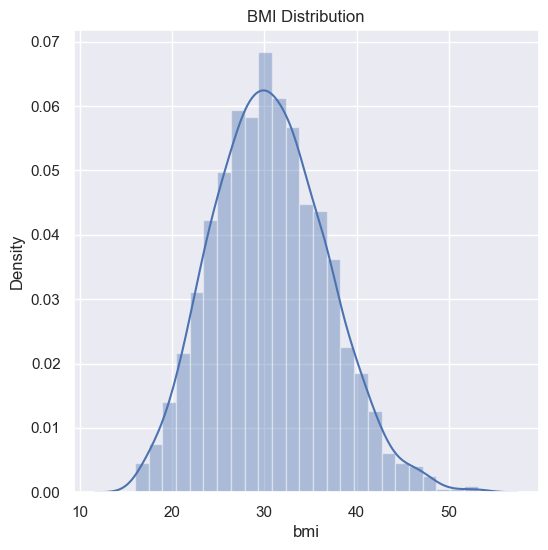

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['bmi'])
plt.title('BMI DistriQbution')
plt.show()

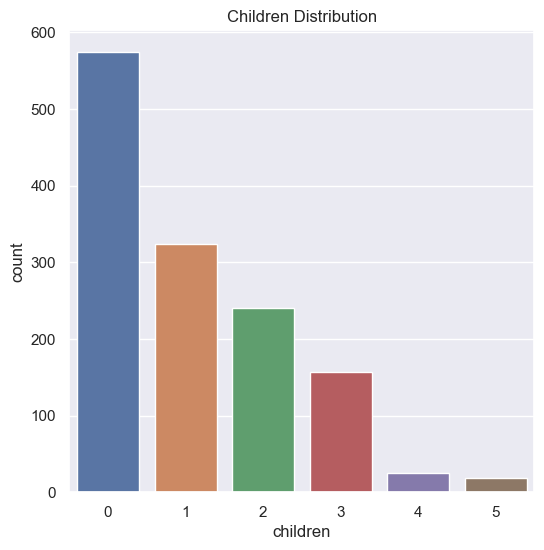

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data = insurance_df)
plt.title("Children Distribution")
plt.show()

In [19]:
insurance_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

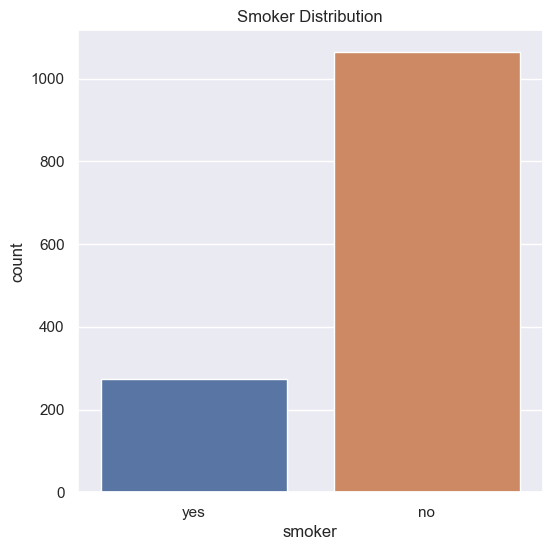

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data = insurance_df)
plt.title("Smoker Distribution")
plt.show()

In [18]:
insurance_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

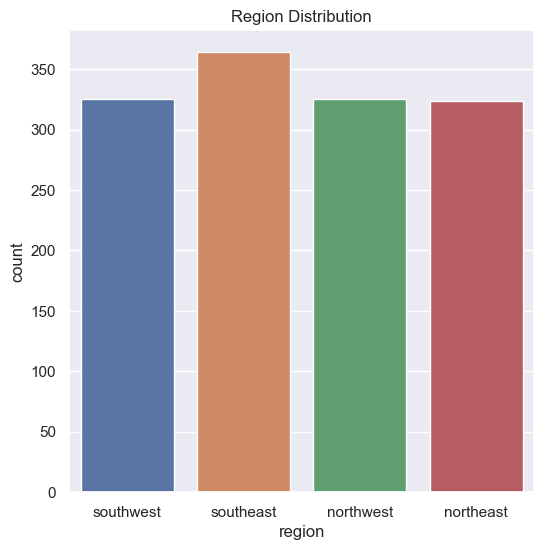

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data = insurance_df)
plt.title("Region Distribution")
plt.show()

In [21]:
insurance_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_12336\967897602.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['charges'])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


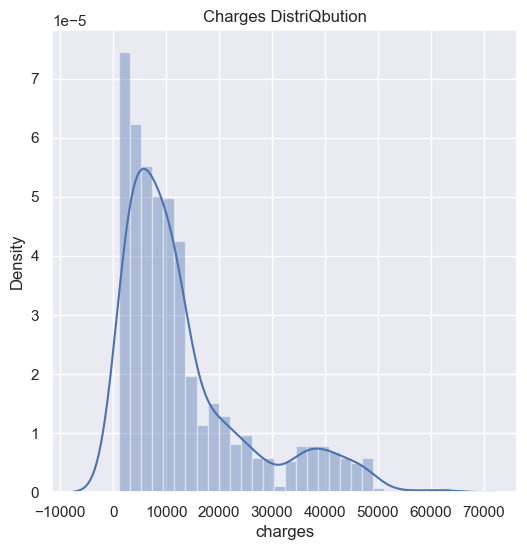

In [22]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['charges'])
plt.title('Charges DistriQbution')
plt.show()

In [23]:
# Label Encoding

In [26]:
insurance_df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

insurance_df.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)

insurance_df.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace=True)

In [27]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [28]:
X = insurance_df.drop(columns='charges', axis = 1)
Y = insurance_df['charges']

In [30]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [31]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [33]:
regressor = LinearRegression()

In [34]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [35]:
train_date_pred = regressor.predict(X_train)

In [36]:
r2_train = metrics.r2_score(Y_train, train_date_pred)
print(r2_train)

0.7518195459072954


In [37]:
test_date_pred = regressor.predict(X_test)

In [38]:
r2_test = metrics.r2_score(Y_test, test_date_pred)
print(r2_test)

0.7454471618659975
